In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
df=pd.read_csv('heart_v2.csv') #dataset

In [3]:
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [4]:
df.shape   

(270, 5)

In [5]:
df.isnull().values.any()  # null value check

False

In [6]:
df.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [7]:
df['heart disease'].value_counts() 
                            

0    150
1    120
Name: heart disease, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart disease', ylabel='count'>

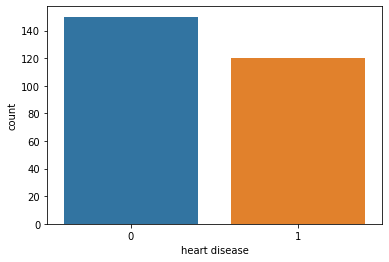

In [8]:
seaborn.countplot(df['heart disease']) # visualization 

<AxesSubplot:xlabel='sex', ylabel='count'>

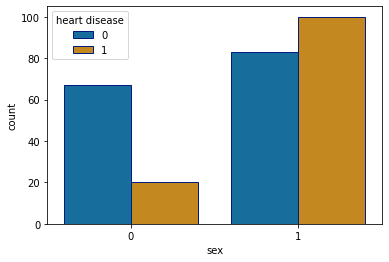

In [9]:
seaborn.countplot(x='sex',hue='heart disease',data=df,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))


<AxesSubplot:xlabel='age', ylabel='count'>

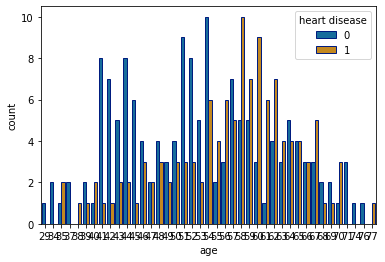

In [10]:
seaborn.countplot(x='age',hue='heart disease', data=df,palette='colorblind', edgecolor=seaborn.color_palette('dark',n_colors=1))


In [11]:
df.describe()   # mean,count,std,min,max 

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [12]:
df.corr()  # co-relation

,age,sex,BP,cholestrol,heart disease
age,1.000000,-0.094401,0.273053,0.220056,0.212322
sex,-0.094401,1.000000,-0.062693,-0.201647,0.297721
BP,0.273053,-0.062693,1.000000,0.173019,0.155383
cholestrol,0.220056,-0.201647,0.173019,1.000000,0.118021
heart disease,0.212322,0.297721,0.155383,0.118021,1.000000


# x and y Separet

In [13]:
x=df.iloc[:,:-1]   # dataset separet

In [14]:
x

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269
...,...,...,...,...
265,52,1,172,199
266,44,1,120,263
267,56,0,140,294
268,57,1,140,192


In [15]:
y=df.iloc[:,4]

In [16]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: heart disease, Length: 270, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=1)

In [19]:
xtrain

,age,sex,BP,cholestrol
123,65,0,160,360
256,61,1,150,243
258,64,1,140,335
31,66,1,160,228
18,64,1,110,211
...,...,...,...,...
203,51,1,140,299
255,71,0,160,302
72,70,1,156,245
235,62,0,160,164


# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
RFC=RandomForestClassifier()  # object

In [22]:
RFC.fit(xtrain,ytrain)

RandomForestClassifier()

In [23]:
RFC.score(xtest,ytest)   # Accuracy

0.6481481481481481

# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
DTC=DecisionTreeClassifier()  # object

In [26]:
DTC.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [27]:
DTC.score(xtest,ytest)   # Accuracy

0.6111111111111112

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
LR=LogisticRegression()  # object

In [30]:
LR.fit(xtrain,ytrain)

LogisticRegression()

In [31]:
LR.score(xtest,ytest)   # Accuracy

0.7037037037037037

# support vector machine(SVM)

In [32]:
from sklearn.svm import SVC

In [33]:
model=SVC()  # object

In [34]:
model.fit(xtrain,ytrain)

SVC()

In [35]:
model.score(xtest,ytest)   # Accuracy

0.6481481481481481

# Logistic Regression Algorithm Accuracy High  